# Demo notebook for Niimpy Exploration layer modules

## Introduction <a class="anchor" id="section_0"></a>

To study and quantify human behavior using longitudinal multimodal digital data, it is essential to get to know the data well first. Theese data from various sources or sensors, such as smartphones and watches and activity trackers, yields data with different types and properties. The data may be a mixture of categorical, ordinal and numerical data, typically consisting of time series measured for multiple subjetcs from different groups. While the data is typically dense, it is also heterogenous and contain lots of missing values. Therefore, the analysis has to be conducted on many different levels.  

This notebook introduces the Niimpy toolbox exploration module, which seeks to address the aforementioned issues. The module has functionalities for exploratory data analysis (EDA) of digital behavioral data. The module aims to produce a summary of the data characteristics, inspecting the structures underlying the data, to detecting patterns and changes in the patterns, and to assess the data quality (e.g., missing data, outliers). This information is highly essential for assessing data validity, data filtering and selection, and for data preprocessing. The module includes functions for [plotting catogorical data](#section_1), [data counts](#section_2), [timeseries lineplots](#section_3), [punchcards](#section_4) and [visualizing missing data.](#section_5)

Exploration module functions are supposed to run after [data preprocessing](https://niimpy.readthedocs.io/en/latest/preprocessing/), but those can be run also on the raw observations.
All the functions are implemented by using [Plotly Python Open sourde Library](https://plotly.com/python/). Plotly enables interactive visualizations which in turn makers it easier to explore different aspects of the data (e.g.,specific timerange and summary statistics).

This notebook uses several sample dataframes for module demonstration. The sample data is already preprocessed, or will be preprocessed in notebook sections before visualizations. When the sample data is loaded, some of the key characteristics of the data are displayed. 

All eploration module functions require the data to follow [data schema.](https://niimpy.readthedocs.io/en/latest/schema/) defined in the Niimpy toolbox [documentation](https://niimpy.readthedocs.io/en/latest/). The user must ensure that the input data follows the specified schema.


***
### Sub-module overview

The following table shows accepted data types, visualization functions and the purpose of each exploration sub-module.

| Sub-module | Data type | Functions | For what |
| :----------- | :----------- | :------------ | :------------ | 
| Categorical plot | Categorical |  Barplot | Observations counts and distributions |
| Count plot | Categorical* / Numerical | Barplot/Boxplot | Observation counts and distibutions |
| Lineplot | Numerical| Lineplot | Trend, cyclicity, patterns | 
| Punchcard | Categorical* / Numerical | Heatmap | Temporal patterns of counts or values  |
| Missingness | Categorical / Numerical | Barplot / Heatmap | Missing data patterns |

Data types denoted with \* are not compatible with every function within the module.
***
### *NOTES*

This notebook uses following definitions referring to data:
* *Feature* refers to dataframe column that stores observations (e.g., numerical sensor values, questionnaire answers)
* *User* refers to unique identifier for each subject in the data. Dataframe should also have a column named as `user`.
* *Group* refers to unique group idenfier. If subjects are grouped, dataframe shoudl have a column named as `group`.

***

### Imports
Here we import modules needed for running this notebook.

In [6]:
import os
import sys
sys.path.append('../../')

from pathlib import Path
import numpy as np
import pandas as pd
import niimpy
from config import config
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import warnings
from niimpy.preprocessing.survey import *
from niimpy.exploration import setup_dataframe
from niimpy.exploration.eda import categorical, countplot, lineplot, missingness, punchcard

In [7]:
from niimpy.exploration import eda

### Plotly settings
Next code block defines default settings for [plotly](https://plotly.com/python/) visualizations. Feel free to adjust the settings according to your needs.

In [8]:
pio.renderers.default = "png"
pio.templates.default = "seaborn"
px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.RdBu
px.defaults.width = 1200
px.defaults.height = 482
warnings.filterwarnings("ignore")

## 1) Categorical plot <a class="anchor" id="section_1"></a>

This section introduces categorical plot module visualizes **categorical data**, such as questionnaire data responses.<br>
We will demonstrate functions by using a mock survey dataframe, containing answers for:
* *Patient Health Questionnaire-2 (PHQ-2)*
* *Perceived Stress Scale (PSS10)*
* *Generalized Anxiety Disorder-2 (GAD-2)*

The data will be preprocessed, and then it's basic characteristics will be summarized before visualizations.

In [9]:
df = niimpy.read_csv(config.SURVEY_PATH, tz='Europe/Helsinki')
df.head()

,user,age,gender,Little interest or pleasure in doing things.,Feeling down; depressed or hopeless.,Feeling nervous; anxious or on edge.,Not being able to stop or control worrying.,In the last month; how often have you felt that you were unable to control the important things in your life?,In the last month; how often have you felt confident about your ability to handle your personal problems?,In the last month; how often have you felt that things were going your way?,In the last month; how often have you been able to control irritations in your life?,In the last month; how often have you felt that you were on top of things?,In the last month; how often have you been angered because of things that were outside of your control?,In the last month; how often have you felt difficulties were piling up so high that you could not overcome them?
0,1,20,Male,several-days,more-than-half-the-days,not-at-all,nearly-every-day,almost-never,sometimes,fairly-often,never,sometimes,very-often,fairly-often
1,2,32,Male,more-than-half-the-days,more-than-half-the-days,not-at-all,several-days,never,never,very-often,sometimes,never,fairly-often,never
2,3,15,Male,more-than-half-the-days,not-at-all,several-days,not-at-all,never,very-often,very-often,fairly-often,never,never,almost-never
3,4,35,Female,not-at-all,nearly-every-day,not-at-all,several-days,very-often,fairly-often,very-often,never,sometimes,never,fairly-often
4,5,23,Male,more-than-half-the-days,not-at-all,more-than-half-the-days,several-days,almost-never,very-often,almost-never,sometimes,sometimes,very-often,never


In [10]:
df.describe()

,user,age
count,1000.000000,1000.000000
mean,500.500000,26.911000
std,288.819436,4.992595
min,1.000000,12.000000
25%,250.750000,23.000000
50%,500.500000,27.000000
75%,750.250000,30.000000
max,1000.000000,43.000000


The dataframe's columns are raw questions from a survey. Some questions belong to a specific category, so we will annotate them with ids. <br> The id is constructed from a prefix (the questionnaire category: GAD, PHQ, PSQI etc.), followed by the question number (1,2,3). Similarly, we will also the answers to meaningful numerical values.

**Note:** It's important that the dataframe follows the below schema before passing into niimpy.

In [11]:
# Convert column name to id, based on provided mappers from niimpy
col_id = {**PHQ2_MAP, **PSQI_MAP, **PSS10_MAP, **PANAS_MAP, **GAD2_MAP}
selected_cols = [col for col in df.columns if col in col_id.keys()]

# Convert data frame to long format
m_df = pd.melt(df, id_vars=['user', 'age', 'gender'], value_vars=selected_cols, var_name='question', value_name='answer')

# Assign questions to codes 
m_df['id'] = m_df['question'].replace(col_id)
m_df.head()

,user,age,gender,question,answer,id
0,1,20,Male,Little interest or pleasure in doing things.,several-days,PHQ2_1
1,2,32,Male,Little interest or pleasure in doing things.,more-than-half-the-days,PHQ2_1
2,3,15,Male,Little interest or pleasure in doing things.,more-than-half-the-days,PHQ2_1
3,4,35,Female,Little interest or pleasure in doing things.,not-at-all,PHQ2_1
4,5,23,Male,Little interest or pleasure in doing things.,more-than-half-the-days,PHQ2_1


We can use a helper method to convert the answers into numerical value. The pre-defined mapper inside survey.py would be useful for this step.

In [13]:
# Transform raw answers to numerical values
m_df['answer'] = niimpy.preprocessing.survey.survey_convert_to_numerical_answer(m_df, 
                                                                         answer_col='answer',
                                                                         question_id='id',
                                                                         id_map=ID_MAP_PREFIX,
                                                                         use_prefix=True)
m_df.head()

,user,age,gender,question,answer,id
0,1,20,Male,Little interest or pleasure in doing things.,1,PHQ2_1
1,2,32,Male,Little interest or pleasure in doing things.,2,PHQ2_1
2,3,15,Male,Little interest or pleasure in doing things.,2,PHQ2_1
3,4,35,Female,Little interest or pleasure in doing things.,0,PHQ2_1
4,5,23,Male,Little interest or pleasure in doing things.,2,PHQ2_1


We can also produce a summary of the questionaire's score. This function can describe aggregated score over the whole population, or specific subgroups.

First we'll show statistics for the whole population:

In [15]:
d1 = niimpy.preprocessing.survey.survey_print_statistic(m_df)
pd.DataFrame(d1)

,GAD2,PSS10,PHQ2
min,0.000000,4.000000,0.0000
max,6.000000,27.000000,6.0000
avg,3.042000,14.006000,3.0520
std,1.536423,3.687759,1.5855


Statistics by the group gender:

In [16]:
d2 = niimpy.preprocessing.survey.survey_print_statistic(m_df, group='gender')
pd.DataFrame(d2)

GAD2                PSS10                 PHQ2          
       Female      Male     Female       Male    Female      Male
min  0.000000  0.000000   4.000000   4.000000  0.000000  0.000000
max  6.000000  6.000000  27.000000  23.000000  6.000000  6.000000
avg  3.087576  2.998035  14.059063  13.954813  3.067210  3.037328
std  1.585157  1.488141   3.783230   3.596247  1.605337  1.567567

And finally statistics for PHQ questionnaires by group:

In [18]:
d3 = niimpy.preprocessing.survey.survey_print_statistic(m_df, group='gender', prefix='PHQ')
pd.DataFrame(d3)

PHQ          
       Female      Male
min  0.000000  0.000000
max  6.000000  6.000000
avg  3.067210  3.037328
std  1.605337  1.567567

## 1.1. Questionnaire summary <a class="anchor" id="section_1_1"></a>

We can now make some plots for the preprocessed data frame. First, we can display the summary for the specific question (*PHQ-2* first question).

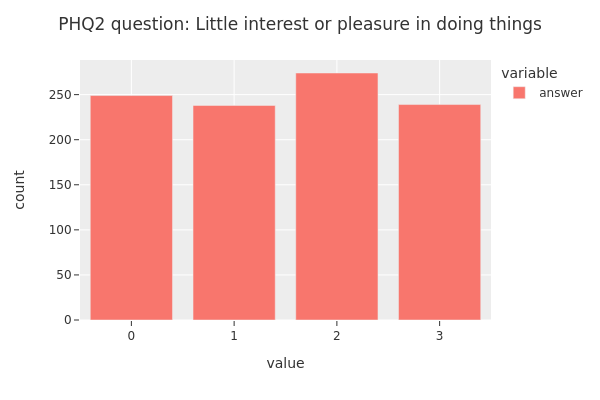

In [19]:
fig = categorical.questionnaire_summary(m_df, 
                                        question = 'PHQ2_1', 
                                        column = 'answer', 
                                        title='PHQ2 question: Little interest or pleasure in doing things', 
                                        xlabel='value', 
                                        ylabel='count', 
                                        width=600, 
                                        height=400)
fig.show()

The figure shows that the answer values (from 0 to 3) almost uniform in distribution.

## 1.2. Questionnaire grouped summary <a class="anchor" id="section_1_2"></a>

We can also display the summary for each subgroup (*gender*).

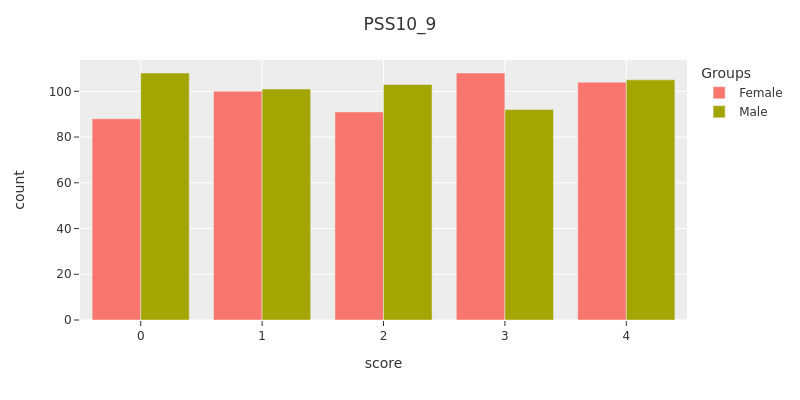

In [20]:
fig = categorical.questionnaire_grouped_summary(m_df, 
                                                question='PSS10_9', 
                                                group='gender', 
                                                title='PSS10_9',
                                                xlabel='score',
                                                ylabel='count',
                                                width=800,
                                                height=400)
fig.show()

The figure shows that the differences between subgroups are not substantially high.

## 1.3. Questionnaire grouped summary score distribution <a class="anchor" id="section_1_3"></a>

With some quick preprocessing, we can display the score distribution of each questionaire.

We'll extract *PSS-10* questionnaire answers from the dataframe.

In [21]:
pss_sum_df = m_df[m_df['id'].str.startswith('PSS')] \
                            .groupby(['user', 'gender']) \
                            .agg({'answer':sum}) \
                            .reset_index()
pss_sum_df['id'] = 'PSS'

We'll quickly inspect the preprocessed dataframe. 

In [22]:
pss_sum_df

,user,gender,answer,id
0,1,Male,15,PSS
1,2,Male,9,PSS
2,3,Male,12,PSS
3,4,Female,16,PSS
4,5,Male,14,PSS
...,...,...,...,...
995,996,Female,17,PSS
996,997,Female,13,PSS
997,998,Male,13,PSS
998,999,Male,21,PSS


And then visualize grouped summary score distribution.

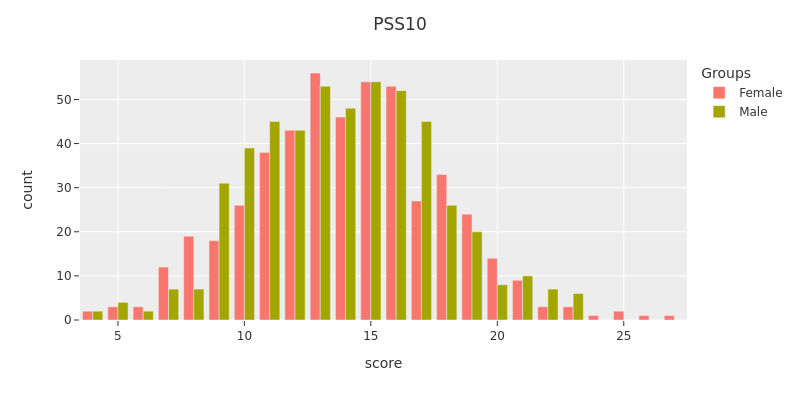

In [23]:
fig = categorical.questionnaire_grouped_summary(pss_sum_df, 
                                                question='PSS', 
                                                group='gender', 
                                                title='PSS10',
                                                xlabel='score', 
                                                ylabel='count',
                                                width=800, 
                                                height=400)
fig.show()

The figure shows that the grouped summary score distrubutions are close to each other.

## 2) Countplot <a class="anchor" id="section_2"></a>
This section introduces Countplot module. The module contain functions for user and group level observation count (number of datapoints per user or group) visualization and observation value distributions.<br>
Observation counts use barplots for user level and a boxplots for group level visualizations. Boxplots are used for group level value distributions.<br>
The module assumes that the visualized **data is numerical**.

### Data
We will use sample from <a href="https://studentlife.cs.dartmouth.edu/dataset.html">StudentLife dataset</a> to demonstrate the module functions. The sample contains hourly aggregated activity data (values from 0 to 5) and group information based on pre- and post-study PHQ-9 test scores. Study subjects have been grouped by the depression symptom severity into groups: *none*, *mild*, *moderate*, *moderately severe*, and *severe*. Preprocessed data sample is included in the Niimpy toolbox *sampledata* folder.

In [24]:
# Load data
sl = niimpy.read_csv(config.SL_ACTIVITY_PATH, tz='Europe/Helsinki')
sl.index = pd.to_datetime(sl.index)
sl_loc = sl.tz_localize(None)

Before visualizations, we'll inspect the data.

In [25]:
sl_loc

,timestamp,user,activity,group
1970-01-01 00:00:00.000000000,2013-03-27 06:00:00-05:00,u00,2,none
1970-01-01 00:00:00.000000001,2013-03-27 07:00:00-05:00,u00,1,none
1970-01-01 00:00:00.000000002,2013-03-27 08:00:00-05:00,u00,2,none
1970-01-01 00:00:00.000000003,2013-03-27 09:00:00-05:00,u00,3,none
1970-01-01 00:00:00.000000004,2013-03-27 10:00:00-05:00,u00,4,none
...,...,...,...,...
1970-01-01 00:00:00.000055902,2013-05-31 18:00:00-05:00,u59,5,mild
1970-01-01 00:00:00.000055903,2013-05-31 19:00:00-05:00,u59,5,mild
1970-01-01 00:00:00.000055904,2013-05-31 20:00:00-05:00,u59,4,mild
1970-01-01 00:00:00.000055905,2013-05-31 21:00:00-05:00,u59,5,mild


In [26]:
sl_loc.describe()

,activity
count,55907.000000
mean,0.750264
std,1.298238
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


In [27]:
sl_loc.group.unique()

array(['none', 'severe', 'mild', 'moderately severe', 'moderate'],
      dtype=object)

## 2.1. User level observation count <a class="anchor" id="section_2_1"></a>
At first we visualize the number of observations for each subject.

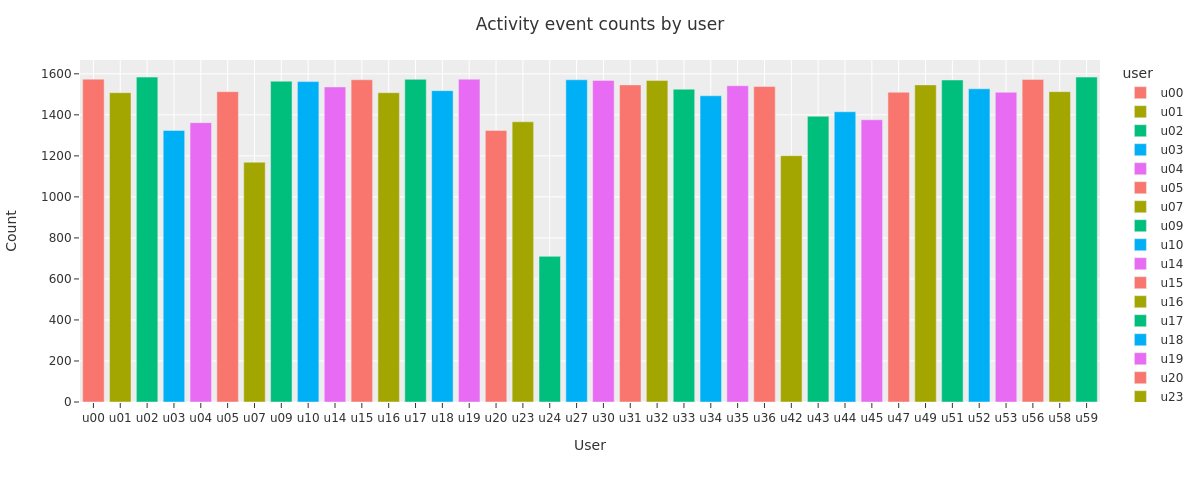

In [28]:
fig = countplot.countplot(sl, 
                          fig_title='Activity event counts by user', 
                          plot_type='count', 
                          points='all',
                          aggregation='user', 
                          user=None, 
                          column=None,
                          binning=False)

fig.show()

The barplot shows that there are differences in user total activity counts. The user *u24* has the lowest event count of 710 and users *u02* and *u59* have the highest count of 1584.

## 2.2. Group level observation count <a class="anchor" id="section_2_2"></a>
Next we'll inspect group level activity event counts aggregated by day. For the improved clarity, we select a timerange of one week from the data.

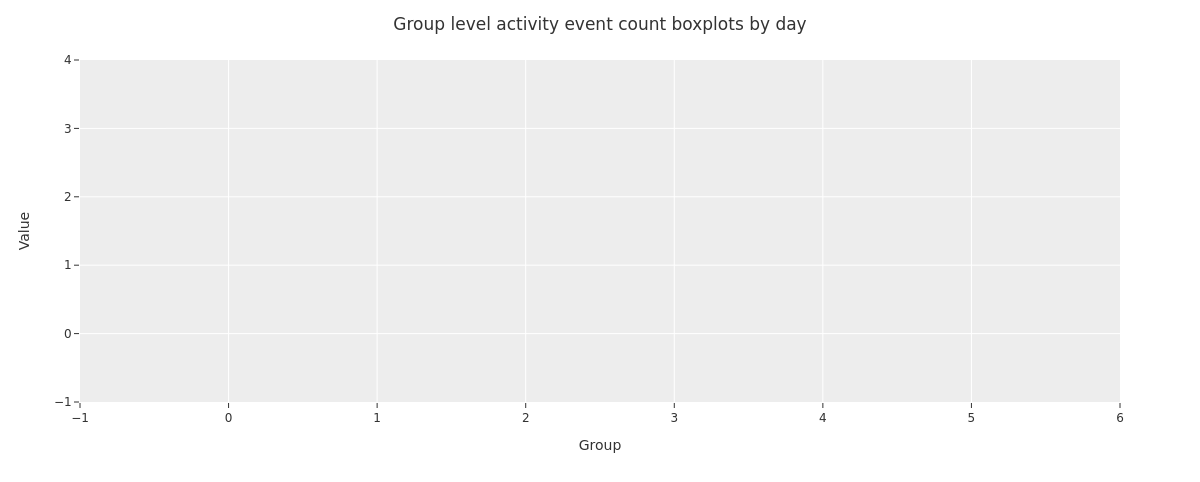

In [29]:
sl_one_week = sl_loc.loc['2013-03-28':'2013-4-3']

fig = countplot.countplot(sl_one_week, 
                          fig_title='Group level activity event count boxplots by day', 
                          plot_type='value', 
                          points='all',
                          aggregation='group', 
                          user=None, 
                          column='activity',
                          binning='D')

fig.show()

The boxplot shows some variability in group level event count distributions across the days spanning from Mar 28 to Apr 3 2013.

## 2.3. Group level value distributions <a class="anchor" id="section_2_3"></a>
Finally we visualize group level activity value distributions.

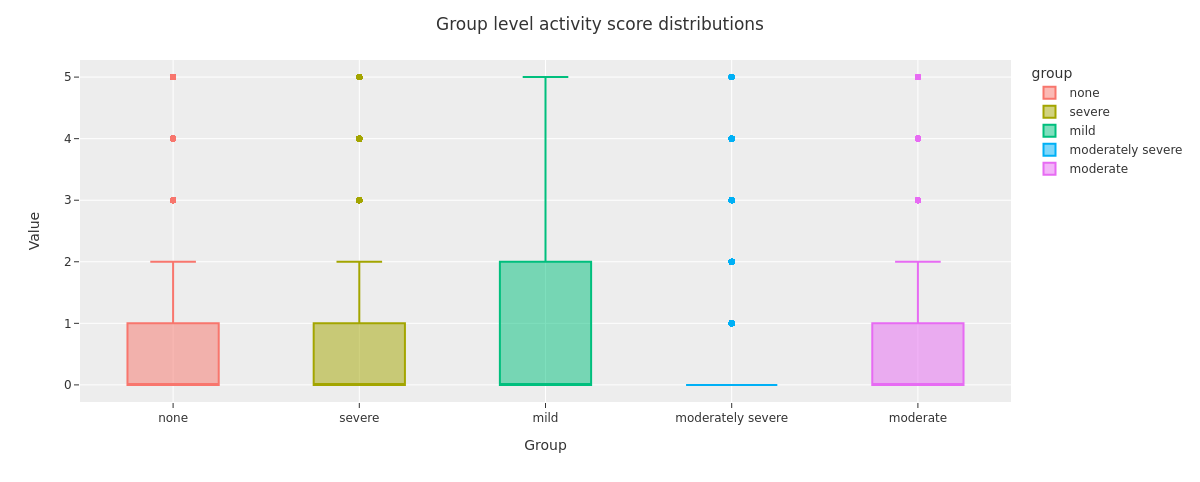

In [30]:
fig = countplot.countplot(sl,
                          fig_title='Group level activity score distributions', 
                          plot_type='value', 
                          points='outliers',
                          aggregation='group', 
                          user=None,
                          column='activity',
                          binning=False)

fig.show()

The boxplot shows that activity score distribution for groups *mild* and *moderately severe* differ from the rest.

## 3. Lineplot <a class="anchor" id="section_3"></a>


This section introduces Lineplot module functions. We use the same <a href="https://studentlife.cs.dartmouth.edu/dataset.html">StudentLife dataset</a> derived activity data as in previous section.

## 3.1. Lineplot <a class="anchor" id="section_3_1"></a>

Lineplot functions display **numerical feature values** on time axis. The user can optionally resample (downsample) and smoothen the data for better visual clarity.

## 3.1.1. Single user single feature <a class="anchor" id="section_3_1_1"></a>
At first, we'll visualize single user single feature data, without resampling or smoothing. 

In [ ]:
fig = lineplot.timeplot(sl_loc,
                        users=['u01'],
                        columns=['activity'],
                        title='User {} activity'.format('u01'),
                        xlabel='Date',
                        ylabel='Value',
                        resample=False,
                        interpolate=False,
                        window=1,
                        reset_index=False)

fig.show()

The figure showing all the activity datapoints is difficult to interpet. By zooming in the time range, the daily patters come apparent. There is no or low activity during the night.

## 3.1.2. Single user single feature index resetted <a class="anchor" id="section_3_1_2"></a>
Next, we'll plot visualize the same data using resampling by hour, and 24 hour rolling window smoothing for improved visualization clarity. We also reset the index, showing now hours from the first activity feature observation.

In [ ]:
fig = lineplot.timeplot(sl_loc,
                        users=['u00'],
                        columns=['activity'],
                        title='User activity',
                        xlabel='Date',
                        ylabel='Value',
                        resample='H',
                        interpolate=True,
                        window=24,
                        reset_index=True)

fig.show()

By zoomin in the smoothed lineplot, daily activity patterns are easier to detect.

## 3.1.3. Single user single feature, aggregated by day <a class="anchor" id="section_3_1_3"></a>
Next visualization shows resamplig by day and 7 day rolling window smoothing, making the activity time series trend visible.   

In [ ]:
fig = lineplot.timeplot(sl_loc,
                        users=['u00'],
                        columns=['activity'],
                        title='User Activity' ,
                        xlabel='Date',
                        ylabel='Value',
                        resample='D',
                        interpolate=True,
                        window=7)

fig.show()

Daily aggregated and smoothed data makes the user activity trend visible. There is a peak at May 9 and the crest at May 23.

## 3.2. Multiple subjects single feature <a class="anchor" id="section_3_2"></a>
The following visualization superimposes three subject's activity on same figure. 

In [ ]:
fig = lineplot.timeplot(sl_loc,
                        users=['u00','u01'],
                        columns=['activity'],
                        title='User activity',
                        xlabel='Date',
                        ylabel='Value',
                        resample='D',
                        interpolate=True,
                        window=7)

fig.show()

The figure shows that the user daily averaged activity is quite similar in the beginning of inspected time range. In first two weeks of May, the activity shows opposing trends (user *u00* activity increases and user *u01* decreases). 

## 3.3. Group level hourly averages <a class="anchor" id="section_3_3"></a>
Next we'll compare group level hourly average activity.

In [ ]:
fig = lineplot.timeplot(sl_loc,
                        users='Group',
                        columns=['activity'],
                        title='User Activity',
                        xlabel='Date',
                        ylabel='Value',
                        resample='D',
                        interpolate=True,
                        window=7,
                        reset_index=False,
                        by='hour')

fig.show()

The time plot reveals that the hourly averaged group level activity follows circadian rhytmn (less activity during the night). Moderately severe group seems to be least active group during the latter half of the day. 

## 3.4. Group level weekday averages <a class="anchor" id="section_3_4"></a>
And finally, 

In [ ]:
fig = lineplot.timeplot(sl_loc,
                        users='Group',
                        columns=['activity'],
                        title='User Activity',
                        xlabel='Date',
                        ylabel='Value',
                        resample='D',
                        interpolate=True,
                        window=7,
                        reset_index=False,
                        by='weekday')

fig.show()

The timeplot shows that there is some differences between the average group level activity, e.g., group *mild* being more active than *moderately severe*. Additionally, activity during Sundays is at lower level in comparison with weekdays.

## 4. Punchcard <a class="anchor" id="section_4"></a>
This section introduces Punchcard module functions. The functions aggregate the data and show the averaged value for each timepoint. <br> We use the same StudentLife dataset derived activity data as in two previous sections.

## 4.1. Single user punchcard <a class="anchor" id="section_4_1"></a>
At first we visualize one daily aggregated mean activity for single subject. We'll change the plot color to grayscale for improved clarity.


In [ ]:
px.defaults.color_continuous_scale = px.colors.sequential.gray

In [ ]:
fig = punchcard.punchcard_plot(sl, 
                               user_list=['u00'],
                               columns=['activity'],
                               title="User {} activity punchcard".format('u00'),
                               resample='D',
                               normalize=False,
                               agg_func=np.mean,
                               timerange=False)

fig.show()

The punchcard reveals that May 5th has the highest average activity and May 18th, 20th, and 21th have the lowest activity.  

## 4.2. Multiple user punchcard <a class="anchor" id="section_4_2"></a>
Next, we'll visualize mean activity for multiple subjects.

In [ ]:
fig = punchcard.punchcard_plot(sl, 
                               user_list=['u00','u01','u02'],
                               columns=['activity'],
                               title="Users {}, {}, and {} activity punchcard".format('u00','u01','u02'),
                               resample='D',
                               normalize=False,
                               agg_func=np.mean,
                               timerange=False)

fig.show()

The punchard allows comparison of daily average activity for multiple subjects. It seems that there is not evident common pattern in the activity.

## 4.3. Single user punchcard showing two features <a class="anchor" id="section_4_3"></a>
Lastly, we'll visualize daily aggregated single user activity side by side with activity of previous week. <br>
We start by shifting the activity by one week and by adding it to the original dataframe. 

In [ ]:
sl_loc['previous_week_activity'] = sl_loc['activity'].shift(periods=7, fill_value=0)

In [ ]:
fig = punchcard.punchcard_plot(sl_loc, 
                               user_list=['u00'],
                               columns=['activity','previous_week_activity'],
                               title="User {} activity and previous week activity punchcard".format('u00'),
                               resample='D',
                               normalize=False,
                               agg_func=np.mean,
                               timerange=False)

fig.show()

The punchcard show weekly repeating patterns in subjects activity.

## 5) Missingness <a class="anchor" id="section_5"></a>
This sections introduces Missingness module for missing data inspection. The module features data missingness visualizations by frequency and by timepoint.<br>
Additionally, it offers an option for missing data correlation visualization.   

### Data 

For data missingness visualizations, we'll create a mock dataframe with missing values using `niimpy.util.create_missing_dataframe` function.

In [ ]:
df_m = setup_dataframe.create_missing_dataframe(nrows=2*24*14, ncols=5, density=0.7, index_type='dt', freq='10T')
df_m.columns = ['User_1','User_2','User_3','User_4','User_5',]

We will quickly inspect the dataframe before the visualizations.

In [ ]:
df_m

In [ ]:
df_m.describe()

## 5.1. Data frequency by feature <a class="anchor" id="section_5_1"></a>

First, we create a histogram to visualize data frequency per column.

In [ ]:
fig = missingness.bar(df_m,
                      xaxis_title='User',
                      yaxis_title='Frequency')
fig.show()

The data frequency is nearly similar for each user, *User_5* having the highest frequency.

## 5.2. Average frequency by user <a class="anchor" id="section_5_2"></a>
Next, we will show average data frequency for all users.

In [ ]:
fig = missingness.bar(df_m, 
                      sampling_freq='30T',
                      xaxis_title='Time',
                      yaxis_title='Frequency')
fig.show()

The overall data frequency suggests no clear pattern for data missingness.

## 5.3. Missingness matrix <a class="anchor" id="section_5_3"></a>
We can also create a missingness matrix visualization for the dataframe. The nullity matrix show data missingess by a timepoint.

In [ ]:
fig = missingness.matrix(df_m,
                         sampling_freq='30T',
                         xaxis_title="User ID",
                         yaxis_title="Time")
fig.show()

## 5.4. Missing data correlations <a class="anchor" id="section_5_4"></a>

Finally, we plot a heatmap to display the correlations between missing data.

Correlation ranges from -1 to 1: 
* -1 means that if one variable appears then the other will be missing. 
* 0 means that there is no correlation between the missingness of two variables. 
* 1 means that the two variables will always appear together.

### Data
For the correlations, we use *NYC collision factors* [sample data](https://github.com/ResidentMario/missingno). 

In [ ]:
collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")

First, we'll inspect the data frame.

In [ ]:
collisions.head()

In [ ]:
collisions.dtypes

We will then inspect the basic statistics.

In [ ]:
collisions.describe()

Finally, we will visualize the nullity (how strongly the presence or absence of one variable affects the presence of another) correlations by a heatmap and a dendrogram.

In [ ]:
fig = missingness.heatmap(collisions)
fig.show()

The nullity heatmap and dendrogram reveals a data correlation structure, e.g., *vehicle type codes* and *contributing factor vehicle* are highly correlated. Features having complete data are not shown on the figure.